In [108]:
import pandas as pd

df = pd.read_csv('./preprocessed_kb_0518.csv', encoding='ansi')
df = df[['price','year','use','depreciation','mileage', 'car_cc']]
df.head()

,price,year,use,depreciation,mileage,car_cc
0,849,2013,103,60,131493,0
1,1450,2018,52,27,60000,1598
2,655,2017,57,54,133319,0
3,999,2017,48,21,90000,1399
4,580,2011,131,83,159474,0


In [109]:
df.corr().round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.51,-0.53,-0.55,-0.38,0.12
year,0.51,1.00,-0.99,-0.86,-0.61,0.02
use,-0.53,-0.99,1.00,0.87,0.61,-0.02
depreciation,-0.55,-0.86,0.87,1.00,0.72,-0.00
mileage,-0.38,-0.61,0.61,0.72,1.00,0.03
car_cc,0.12,0.02,-0.02,-0.00,0.03,1.00


In [110]:
from scipy.stats import pearsonr

df.corr(method='pearson').round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.51,-0.53,-0.55,-0.38,0.12
year,0.51,1.00,-0.99,-0.86,-0.61,0.02
use,-0.53,-0.99,1.00,0.87,0.61,-0.02
depreciation,-0.55,-0.86,0.87,1.00,0.72,-0.00
mileage,-0.38,-0.61,0.61,0.72,1.00,0.03
car_cc,0.12,0.02,-0.02,-0.00,0.03,1.00


In [111]:
from scipy.stats import spearmanr

df.corr(method='spearman').round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.69,-0.70,-0.68,-0.50,0.19
year,0.69,1.00,-0.99,-0.90,-0.68,0.05
use,-0.70,-0.99,1.00,0.91,0.69,-0.05
depreciation,-0.68,-0.90,0.91,1.00,0.79,-0.02
mileage,-0.50,-0.68,0.69,0.79,1.00,0.01
car_cc,0.19,0.05,-0.05,-0.02,0.01,1.00


In [112]:
from scipy.stats import kendalltau

df.corr(method='kendall').round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.52,-0.51,-0.50,-0.35,0.14
year,0.52,1.00,-0.95,-0.76,-0.52,0.04
use,-0.51,-0.95,1.00,0.74,0.51,-0.04
depreciation,-0.50,-0.76,0.74,1.00,0.60,-0.01
mileage,-0.35,-0.52,0.51,0.60,1.00,0.00
car_cc,0.14,0.04,-0.04,-0.01,0.00,1.00


In [113]:
from sklearn.model_selection import train_test_split

x = df[['year', 'use', 'depreciation', 'mileage', 'car_cc']]

y = df.price

X_test, X_train, y_test, y_train = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [114]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_pred = mlr.predict(X_test)

In [115]:
test = [[2011, 134, 90, 198485, 2977]]
test_pred = mlr.predict(test)
test_pred

c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([519.66304174])

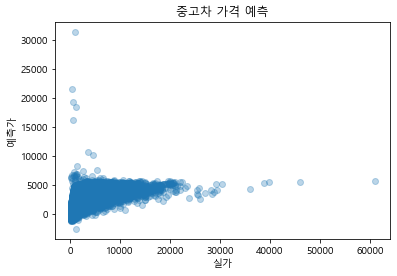

In [116]:
import matplotlib.pyplot as plt

plt.scatter(y_test, mlr_pred, alpha=0.3)
plt.xlabel("실가")
plt.ylabel("예측가")
plt.title("중고차 가격 예측")
plt.show()

0.3428204239482643


c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


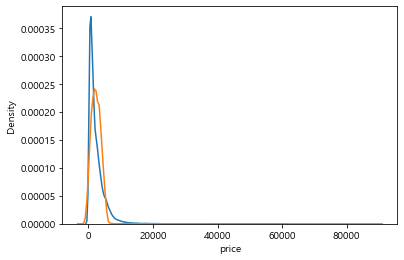

In [95]:
import seaborn as sns

coef = mlr.score(X_train, y_train)
print(coef)

ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(mlr_pred, hist = False, label = 'y예측')
plt.show()

In [64]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

folmula = "price ~ " + "+".join(df.columns[1:])
y, X = dmatrices(folmula, data = df, return_type='dataframe')

In [68]:
df_vif = pd.DataFrame()
df_vif["colname"] = X.columns
df_vif["VIF"] = [vif(X.values, i).round(1) for i in range(len(X.columns))]
df_vif

,colname,VIF
0,Intercept,17806159.7
1,year,57.4
2,use,61.1
3,depreciation,5.4
4,mileage,2.1
5,car_cc,1.0


In [72]:
df_sub = pd.concat([df.loc[:, "price":"year"],
df.loc[:, "depreciation":"car_cc"]],
axis=1)
df_sub

,price,year,depreciation,mileage,car_cc
0,849,2013,60,131493,0
1,1450,2018,27,60000,1598
2,655,2017,54,133319,0
3,999,2017,21,90000,1399
4,580,2011,83,159474,0
...,...,...,...,...,...
44241,290,2006,93,143900,1781
44242,400,2007,94,188310,2393
44243,630,2010,83,144233,3500
44244,990,2012,78,136212,1968


In [75]:
folmula = "price ~ " + "+".join(df_sub.columns[1:])
y, X = dmatrices(folmula, data = df_sub, return_type='dataframe')
df_vif = pd.DataFrame()
df_vif["colname"] = X.columns
df_vif["VIF"] = [vif(X.values, i).round(1) for i in range(X.shape[1])]
df_vif

,colname,VIF
0,Intercept,1229404.4
1,year,4.0
2,depreciation,5.1
3,mileage,2.1
4,car_cc,1.0


In [76]:
from statsmodels.formula.api import ols

folmula = "price ~ " + "+".join(df_sub.columns[1:])

model = ols(folmula, data = df_sub).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     5140.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        20:16:53   Log-Likelihood:            -3.9988e+05
No. Observations:               44246   AIC:                         7.998e+05
Df Residuals:                   44241   BIC:                         7.998e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.875e+05   1.07e+04    -17.471      0.000   -2.09e+05   -1.66e+05
year            95.3282      5.308     17.960      0.000      84.925     105.732
depreciation   -45.1268      0.918    -49.142      0.000     -46.927     -43.327
mileage          0.0007      0.000      3.264      0.001       0.000       0.001
car_cc           0.1216      0.004     29.327      0.000       0.114       0.130
==============================================================================
Omnibus:                    39030.081   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3614514.378
Skew:                           3.838   Prob(JB):                         0.00
Kurtosis:                      46.608   Cond. No.                     1.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
df_test = df.iloc[[0], ]
df_test['year'] = 2011
df_test['use'] = 123
df_test['depreciation'] = 90
df_test['mileage'] = 198485
df_test['car_cc'] = 2977

df_test

C:\Users\USER\AppData\Local\Temp\ipykernel_16188\3290304162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['year'] = 2011
C:\Users\USER\AppData\Local\Temp\ipykernel_16188\3290304162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['use'] = 123
C:\Users\USER\AppData\Local\Temp\ipykernel_16188\3290304162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,price,year,use,depreciation,mileage,car_cc
0,849,2011,123,90,198485,2977


In [123]:
model.predict(df_test)

0    624.642419
dtype: float64